In [28]:
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
%pylab inline
import json

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [9]:
import itertools
import random
import pandas as pd

In [37]:
zipcodedistance = pd.read_csv("ZipcodeDistance.csv")

In [38]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    meters = 6373 * 1000 * c
    return meters

In [31]:
cbikelist = [10001, 10002, 10003, 10004, 10005, 10007, 10009, 10010, 10011, 10012, 
             10013, 10014, 10016, 10017, 10018, 10019, 10021, 10022, 10023, 10024,
             10028, 10036, 10038, 10065, 10075, 10280, 10281, 10282, 11101, 11201,
             11205, 11206, 11211, 11216, 11217, 11220, 11221, 11222, 11233, 11238, 
             11251]
dist_dict = {}
for subset in itertools.product(cbikelist,cbikelist):
    dist_dict[str(subset[0])+str(subset[1])] = random.randint(2,200)

In [36]:
print dist_dict

{'1000111220': 108, '1000111221': 45, '1000111222': 164, '1028211101': 26, '1120611251': 194, '1001110028': 18, '1001110021': 9, '1001110022': 13, '1001110023': 40, '1001110024': 165, '1000510038': 162, '1000510036': 65, '1123811233': 95, '1123811238': 165, '1003610028': 185, '1122211238': 122, '1003610023': 171, '1003610022': 106, '1003610021': 23, '1122211233': 80, '1003610024': 148, '1002310003': 55, '1002310002': 146, '1002310001': 22, '1002310007': 75, '1002310005': 45, '1002310004': 157, '1002211216': 99, '1002211217': 74, '1002310009': 121, '1002211211': 177, '1001211238': 21, '1001211233': 168, '1006510065': 173, '1001811238': 90, '1001811233': 172, '1121110038': 76, '1000110065': 17, '1121110036': 45, '1123810019': 70, '1123810018': 108, '1003810065': 33, '1123810012': 29, '1123810011': 115, '1123810010': 123, '1123810017': 132, '1123810016': 114, '1123810014': 110, '1002110065': 49, '1000110281': 87, '1000110280': 129, '1110110036': 90, '1000110282': 70, '1000511211': 123, '1

In [4]:
f = open('./results/results_TotalJanMaySept', 'r')
pairs = f.read().split("\n")

dict_total = {}
zip_pair_pre = None
cnt = 0
tm_list = []
mode_list = []
for item in pairs[:-1]:
    print(item)
    trip, av_time, count = item.split("\t") #  
    zip_pair, mode = trip.split("|")
    zip_origin, zip_destin = zip_pair[:5], zip_pair[5:]
    if zip_pair == zip_pair_pre:
        cnt += 1
    else:
        if cnt == 2 and len(set(mode_list))==2:
            # Taxis - Citi bike
            #dict_total[zip_pair_pre] = [100*((float(tm_list[-2:][1]) - float(tm_list[-2:][0]) )/ float(tm_list[-2:][1])), dist_dict[zip_pair_pre] ]
            # Structure of the dictionay values: difference (taxis - bikes), distance, Citi Bike time, Taxi time.            
            dict_total[zip_pair_pre] = [float(tm_list[-2:][1]) - float(tm_list[-2:][0]) , dist_dict[zip_pair_pre] ,float(tm_list[-2:][0]) ,float(tm_list[-2:][1])]
            print("Si")
            tm_list = []
            mode_list = []
        cnt=1
    zip_pair_pre = zip_pair
    tm_list.append(av_time)
    mode_list.append(mode)

0008310001|citibike	1939 	 35
0008310002|citibike	951 	 13
0008310003|citibike	1989 	 2
0008310005|citibike	1346 	 6
0008310009|citibike	287 	 1
0008310010|citibike	1247 	 6
0008310011|citibike	983 	 6
0008310013|citibike	1368 	 4
0008310014|citibike	1813 	 3
0008310016|citibike	1559 	 4
0008310017|citibike	948 	 20
0008310018|citibike	763 	 15
0008310019|citibike	799 	 14
0008310022|citibike	815 	 66
0008310023|citibike	697 	 48
0008310036|citibike	708 	 31
0008311211|citibike	707 	 16
1000100083|citibike	1658 	 1
1000110001|citibike	2130 	 23
1000110001|taxis	371 	 4451
1000110002|citibike	446 	 170486
Si
1000110002|taxis	1556 	 238
1000110003|citibike	1224 	 35978
Si
1000110003|taxis	749 	 1826
1000110004|citibike	722 	 129783
Si
1000110004|taxis	1687 	 114
1000110005|citibike	1353 	 11654
Si
1000110005|taxis	1761 	 53
1000110007|citibike	1294 	 9754
Si
1000110007|taxis	1420 	 156
1000110009|citibike	1068 	 23251
Si
1000110009|taxis	1044 	 497
1000110010|citibike	949 	 42451
Si
1000

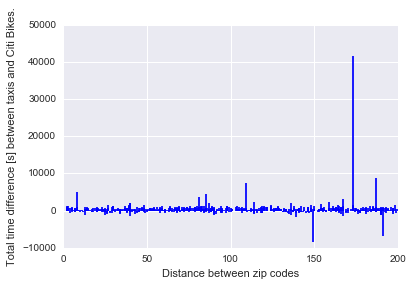

In [8]:
plt.vlines([val[1] for val in dict_total.values()], [0],[val[0] for val in dict_total.values()],color='blue')
plt.xlabel("Distance between zip codes")
plt.ylabel("Total time difference [s] between taxis and Citi Bikes.")

In [11]:
Total_trips = pd.DataFrame({"Citi Bike": [val[2] for val in dict_total.values()], 
                            "Taxi":[val[3] for val in dict_total.values()]},columns=["Citi Bike","Taxi"])

In [12]:
print "Mean for Citi bike: "+str(np.mean([val[2] for val in dict_total.values()]))
print "Mean for Taxis: " +str(np.mean([val[3] for val in dict_total.values()]))

Mean for Citi bike: 1091.2
Mean for Taxis: 1386.74567901


C:\Users\jhuan\Anaconda2\lib\site-packages\seaborn\categorical.py:2125: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


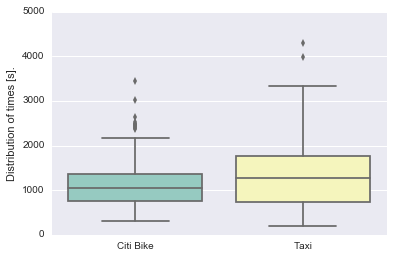

In [13]:
ax = sns.boxplot(Total_trips,palette="Set3")
ax.set_ylim(0,5000)
ax.set( ylabel= "Distribution of times [s].")

In [14]:
#Crete pairs for weekday rush vs. non-rush scenarios.
f = open('./results/results_RushJanMaySept', 'r')
pairs = f.read().split("\n")

dict_rush = {}
zip_pair_pre = None
cnt = 0
tm_list = []
mode_list = []
for item in pairs[:-1]:
    print(item)
    trip, av_time, count = item.split("\t") #  
    zip_pair, form = trip.split("|")
    mode, rush = form.split("&")
    zip_origin, zip_destin = zip_pair[:5], zip_pair[5:]
    if zip_pair == zip_pair_pre:
        cnt += 1
    else:
        if cnt == 4 and len(set(mode_list))==2:
            # citibike&rush, citibike&valley, taxis&rush, taxis&valley 
            # Taxi - Citi bike rush, Taxi - Citi Bike non rush
            dict_rush[zip_pair_pre] = [['rush','valley'],  float(tm_list[-4:][2]) - float(tm_list[-4:][0]),float(tm_list[-4:][3]) - float(tm_list[-4:][1])  , dist_dict[zip_pair_pre]] #100*((float(tm_list[-2:][1]) - float(tm_list[-2:][0]) )/ float(tm_list[-2:][1])) 
            print("Si")
            tm_list = []
            mode_list = []
        cnt=1
    zip_pair_pre = zip_pair
    tm_list.append(av_time)
    mode_list.append(mode)

0008300083|citibike&valley	1934 	 5
0008310001|citibike&rush	1554 	 7
0008310001|citibike&valley	1234 	 4
0008310003|citibike&rush	852 	 7
0008310003|citibike&valley	1260 	 1
0008310005|citibike&valley	1256 	 2
0008310009|citibike&rush	287 	 1
0008310011|citibike&rush	1237 	 5
0008310011|citibike&valley	1414 	 2
0008310013|citibike&valley	1596 	 1
0008310014|citibike&valley	1698 	 1
0008310016|citibike&rush	1348 	 1
0008310016|citibike&valley	738 	 4
0008310017|citibike&rush	1025 	 5
0008310017|citibike&valley	758 	 1
0008310018|citibike&valley	709 	 4
0008310019|citibike&rush	809 	 8
0008310019|citibike&valley	548 	 9
0008310022|citibike&rush	671 	 21
0008310022|citibike&valley	498 	 10
0008310023|citibike&rush	691 	 14
0008310023|citibike&valley	231 	 3
0008310036|citibike&rush	516 	 15
0008310036|citibike&valley	745 	 4
0008311211|citibike&rush	641 	 5
1000100083|citibike&rush	1658 	 1
1000100083|citibike&valley	1251 	 7
1000110001|citibike&rush	3833 	 8
1000110001|citibike&valley	3

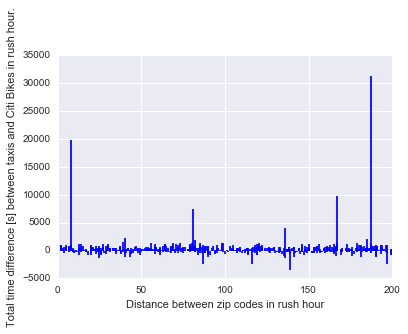

In [15]:
plt.vlines([val[3] for val in dict_rush.values()], [0],[val[1] for val in dict_rush.values()],color='blue')
plt.xlabel("Distance between zip codes in rush hour")
plt.ylabel("Total time difference [s] between taxis and Citi Bikes in rush hour.")

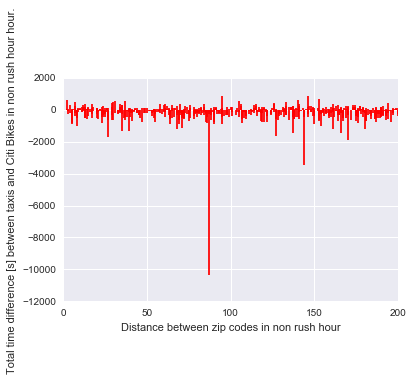

In [16]:
plt.vlines([val[3] for val in dict_rush.values()], [0],[val[2] for val in dict_rush.values()],color='red')
plt.xlabel("Distance between zip codes in non rush hour")
plt.ylabel("Total time difference [s] between taxis and Citi Bikes in non rush hour hour.")

In [17]:
print "Mean difference in rush hour: "+str(np.mean([val[1] for val in dict_rush.values()]))
print "Mean difference in non rush hour: " +str(np.mean([val[2] for val in dict_rush.values()]))

Mean difference in rush hour: 253.708933718
Mean difference in non rush hour: -154.808357349


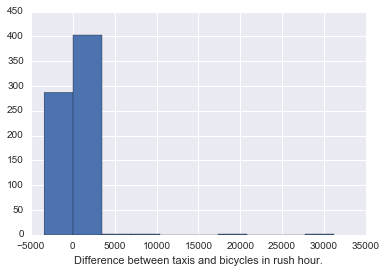

In [18]:
plt.hist([val[1] for val in dict_rush.values()])
plt.xlabel("Difference between taxis and bicycles in rush hour.")

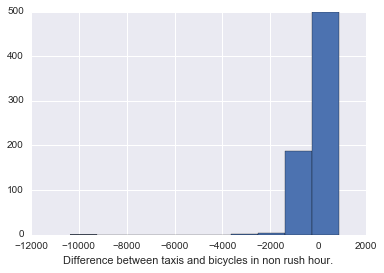

In [19]:
plt.hist([val[2] for val in dict_rush.values()])
plt.xlabel("Difference between taxis and bicycles in non rush hour.")

In [21]:
#Create pairs for weekend day vs-night scenarios.
f = open('./results/results_SaturdayJanMaySept', 'r')
pairs = f.read().split("\n")

dict_weekend = {}
zip_pair_pre = None
cnt = 0
tm_list = []
mode_list = []
for item in pairs[:-1]:
    print(item)
    trip, av_time, count = item.split("\t") #  
    zip_pair, form = trip.split("|")
    mode, rush = form.split("&")
    zip_origin, zip_destin = zip_pair[:5], zip_pair[5:]
    if zip_pair == zip_pair_pre:
        cnt += 1
    else:
        if cnt == 4 and len(set(mode_list))==2:
            # citibike&day, citibike&night, taxis&day, taxis&night  
            dict_weekend[zip_pair_pre] = [['day','night'],  float(tm_list[-4:][2]) - float(tm_list[-4:][0]) ,float(tm_list[-4:][3]) - float(tm_list[-4:][1]), dist_dict[zip_pair_pre] ] #100*((float(tm_list[-2:][1]) - float(tm_list[-2:][0]) )/ float(tm_list[-2:][1])) 
            print("Si")
            tm_list = []
            mode_list = []
        cnt=1
    zip_pair_pre = zip_pair
    tm_list.append(av_time)
    mode_list.append(mode)

0008310016|citibike&night	2233 	 1
0008310019|citibike&night	810 	 1
1000110001|citibike&day	952 	 3
1000110001|citibike&night	309 	 5
1000110001|taxis&day	293 	 70
1000110001|taxis&night	414 	 16567
1000110002|citibike&night	443 	 7170
Si
1000110002|taxis&day	1536 	 3
1000110002|taxis&night	1224 	 3331
1000110003|citibike&day	1415 	 2985
1000110003|citibike&night	446 	 2
1000110003|taxis&day	751 	 25
1000110003|taxis&night	761 	 11495
1000110004|citibike&night	848 	 8260
Si
1000110004|taxis&day	1828 	 1
1000110004|taxis&night	1165 	 1200
1000110005|taxis&day	1137 	 327
1000110005|taxis&night	1208 	 578
1000110007|taxis&day	1135 	 359
1000110007|taxis&night	1056 	 1775
1000110009|citibike&night	1101 	 532
1000110009|taxis&day	1031 	 6
1000110009|taxis&night	983 	 3245
1000110010|citibike&day	1141 	 3085
1000110010|citibike&night	385 	 1
1000110010|taxis&day	324 	 10
1000110010|taxis&night	525 	 7163
1000110011|citibike&day	547 	 4171
Si
1000110011|citibike&night	417 	 1
1000110011|taxi

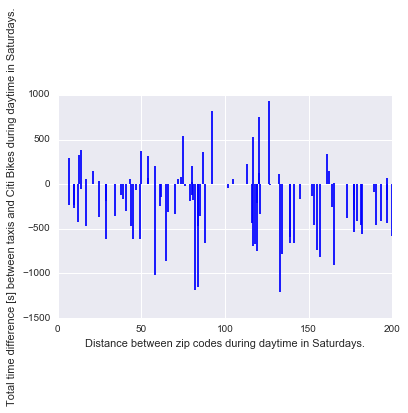

In [22]:
plt.vlines([val[3] for val in dict_weekend.values()], [0],[val[1] for val in dict_weekend.values()],color='blue')
plt.xlabel("Distance between zip codes during daytime in Saturdays.")
plt.ylabel("Total time difference [s] between taxis and Citi Bikes during daytime in Saturdays.")

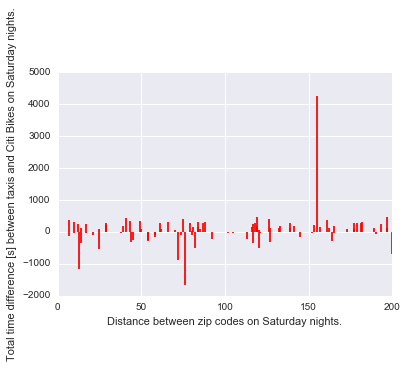

In [23]:
plt.vlines([val[3] for val in dict_weekend.values()], [0],[val[2] for val in dict_weekend.values()],color='red')
plt.xlabel("Distance between zip codes on Saturday nights.")
plt.ylabel("Total time difference [s] between taxis and Citi Bikes on Saturday nights.")

In [25]:
print "Mean difference on Saturday daytime: "+str(np.mean([val[1] for val in dict_weekend.values()]))
print "Mean difference on Saturday night: " +str(np.mean([val[2] for val in dict_weekend.values()]))

Mean difference on Saturday daytime: -215.936842105
Mean difference on Saturday night: 65.8421052632


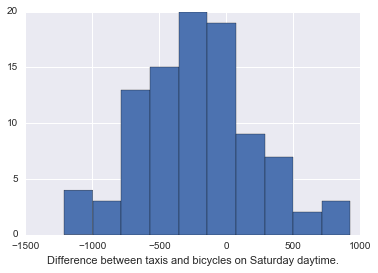

In [26]:
plt.hist([val[1] for val in dict_weekend.values()])
plt.xlabel("Difference between taxis and bicycles on Saturday daytime.")

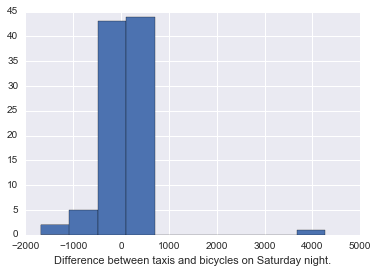

In [27]:
plt.hist([val[2] for val in dict_weekend.values()])
plt.xlabel("Difference between taxis and bicycles on Saturday night.")

In [ ]:
# # -- Save dictionaries in json files  
  

# with open('./results/total_trips.json', 'w') as fp:
#     json.dump(dict_total, fp)
    
# with open('./results/rush_nonrush.json', 'w') as fp:
#     json.dump(dict_rush, fp)

# with open('./results/total_weekends.json', 'w') as fp:
#     json.dump(dict_weekend, fp)  